# <font color=#f06969>Evaluation of Synthetic Data</font>

## PRISM dataset evaluation from synthetic data generated on 03/09/2020
<hr>

The following jupyter notebook evaluates the distribution, fidelity and usefulness of the synthetic data synthesised for the PRISM dataset.<br>
The evaluation methods included are:
#### 1. Distribution evaluation methods:
[1.1 Numerical variables distribution comparison](#hist_link)
<br>[1.2 Categorical variables distribution comparison](#cat_link)
<br>[1.3 Pearson's Correlation Coefficient comparison](#pearsons_link)

#### 2. Fidelity evaluation methods:
[2.1 tSNE and PCA plots comparison](#tSNE_PCA_link)
<br>[2.2 Discriminative model performance](#discrim_link)
<br>[2.3 Autocorrelation comparison](#auto_link)

#### 3. Usefulness evaluation methods:
[3.1 Predictive model performance comparison](#pred_link)
<br>[3.2 Next-step predictive model performance comparison](#tpred_link)

<hr>

# <font color=#0275D8>Importing Packages</font>

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, accuracy_score

from evaluation.helper_eval import *
from evaluation.distributions_eval import *
from evaluation.fidelity_eval import *
from evaluation.predictive_eval import *

<hr>

# <font color=#0275D8>Data Loading and Preparation </font>

In [2]:
# specify numerical columns
num_cols = ['ab_pain_dur', 'age', 'aneroxia_dur', 'plasmodium_density',
               'cough_dur', 'diarrhea_dur', 'fatigue_dur', 'fever_dur', 'headache_dur',
               'height', 'hemoglobin', 'joint_pain_dur', 'muscle_ache_dur', 'temp',
               'vomit_dur', 'weight', 'dday', 'first_dday']

# specify categorical columns
cat_cols = ['complicated_malaria_no',
    'complicated_malaria_not_assessed', 'complicated_malaria_yes',
    'febrile_no', 'febrile_yes', 'ITN_no', 'ITN_not_applicable', 'ITN_yes',
    'malaria_no', 'malaria_yes',
    'malaria_parasite_blood_smear_indicated_but_not_done',
    'malaria_parasite_blood_smear_negative_/_lamp_negative',
    'malaria_parasite_blood_smear_negative_/_lamp_not_done',
    'malaria_parasite_blood_smear_negative_/_lamp_positive',
    'malaria_parasite_blood_smear_not_indicated',
    'malaria_parasite_blood_smear_positive_/_no_malaria',
    'malaria_parasite_symptomatic_malaria',
    'malaria_treatment_artmether-lumefantrine_for_uncomplicated_malaria',
    'malaria_treatment_no_malaria_medications_given',
    'malaria_treatment_quinine_for_uncomplicated_malaria_in_the_1st_trimester_of_pregnancy',
    'malaria_treatment_quinine_for_uncomplicated_malaria_within_14_days_of_a_previous_treatment_for_malaria',
    'malaria_treatment_quinine_or_artesunate_for_complicated_malaria',
    'plasmodium_gametocytes_no', 'plasmodium_gametocytes_yes',
    'plasmodium_lamp_negative', 'plasmodium_lamp_no_result',
    'plasmodium_lamp_positive', 'visit_type_enrollment',
    'visit_type_scheduled_visit', 'visit_type_unscheduled_visit']

In [3]:
# load in original and generated (intermediate) csv
ori = pd.read_csv('data_attr/ori_prism_cleaned.csv')
gen = pd.read_csv('data_attr/gen_prism_int_e200.csv')

# get numerical and categorical columns for original and generated data
ori_num = get_numerical_columns_df(ori, num_cols)
gen_num = get_numerical_columns_df(gen, num_cols)
ori_cat = get_categorical_columns_df(ori, cat_cols)
gen_cat = get_categorical_columns_df(gen, cat_cols)

# turn dataframe into 3D np arrays (both cat and num data)
ori_3d = Stack2DSequence(ori) #shape (1347,130,48)
gen_3d = Stack2DSequence(gen) #shape (1347,130,48)

# turn dataframe into 3D np arrays of only numerical or categorical data
ori_3d_num = Stack2DSequence(get_numerical_columns_df(ori, num_cols, return_id=True))
gen_3d_num = Stack2DSequence(get_numerical_columns_df(gen, num_cols, return_id=True))
ori_3d_cat = Stack2DSequence(get_categorical_columns_df(ori, cat_cols, return_id=True))
gen_3d_cat = Stack2DSequence(get_categorical_columns_df(gen, cat_cols, return_id=True))

# load in original original and generated csv already with date time and same column names as original original
ori_auto = pd.read_csv("../../isaFull.tsv", '\t')
gen_auto = pd.read_csv('data_attr/gen_prism_at_final_e200.csv')
#remove <5 visits from original original data to match the generated data.
ori_auto_5above = ori_auto[ori_auto.groupby('Participant_Id')['Participant_Id'].transform('size') >= 5].reset_index(drop=True)

In [4]:
# create a dictionary for the case where we want to loop through multiple sets of real and gen data
synthetic_data_dic = {'DoppelGANger_0903':[ori, gen]}
synthetic_num_dic = {'DoppelGANger_0903':[ori_num, gen_num]}
synthetic_cat_dic = {'DoppelGANger_0903':[ori_cat, gen_cat]}
synthetic_array_dic = {'DoppelGANger_0903':[ori_3d, gen_3d]}
synthetic_array_num_dic = {'DoppelGANger_0903':[ori_3d_num, gen_3d_num]}
synthetic_array_cat_dic = {'DoppelGANger_0903':[ori_3d_cat, gen_3d_cat]}
synthetic_auto_dic = {'DoppelGANger_0903': [ori_auto_5above, gen_auto]}
syn_keys = list(synthetic_data_dic.keys())
n = len(syn_keys)

<hr>

# <font color=#0275D8> 1. Distribution evaluation</font>

<a id = "hist_link" Here ></a>

## <font color=#472F91> 1.1 Numerical variables distribution comparison </font>

### <u> Method description </u>

For numerical columns, histograms for the original dataset and the generated dataset are overlaid for each column, giving a visual perception of the similarity in diversity and distribution.
To quantify this, a Kolmogrov-Smirnov Test is performed with 100 randomly selected samples to avoid biasing the result towards rejecting the null hypothesis. The Kolmogrov-Smirnov Test is a non parametric hypothesis test where the null hypothesis is that two samples (one from the original and one from the synthetic) originate from the same distribution.
<br><b>The closer the Kolmogrov-Smirnov Test p-value is to 1, the higher the fidelity</b>

### <u> Results </u>

Overlays of original and generated histograms (probability density function) and corresponding cumulative distribution function for each column of the dataset.

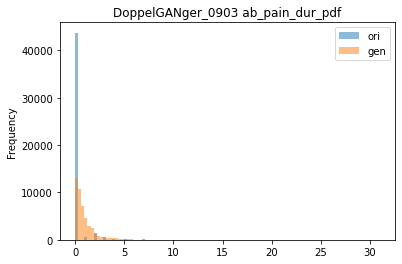

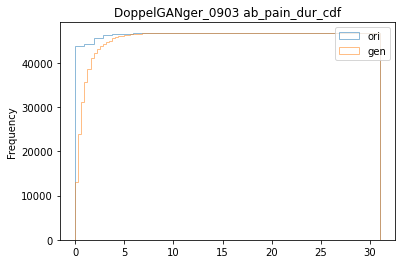

K-S test result: [9.25000000e-01 1.95998682e-40]


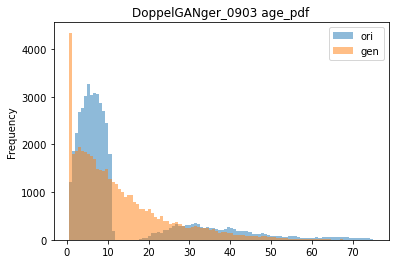

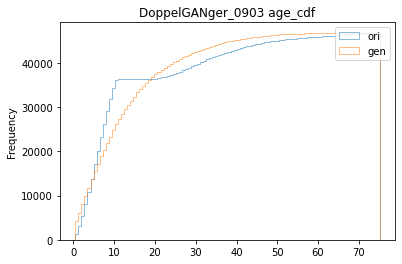

K-S test result: [0.202      0.06817144]


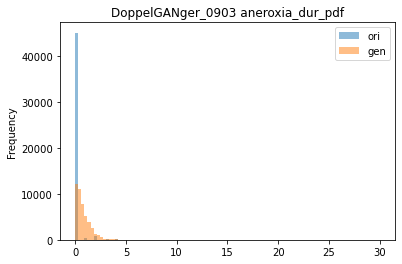

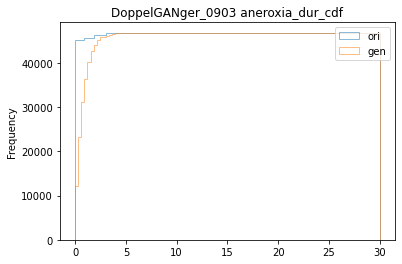

K-S test result: [9.68000000e-01 1.21700932e-46]


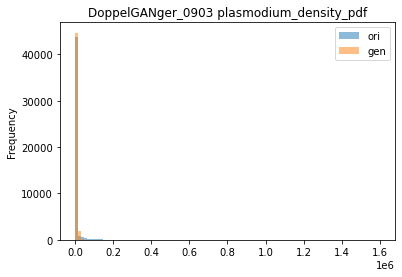

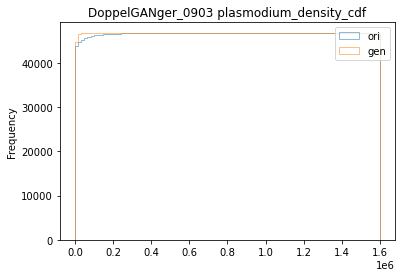

K-S test result: [8.0600000e-01 6.7465195e-28]


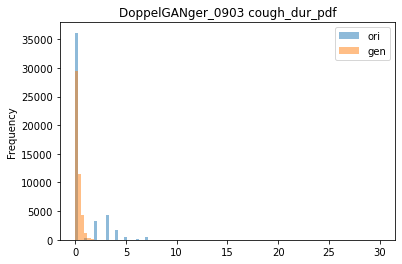

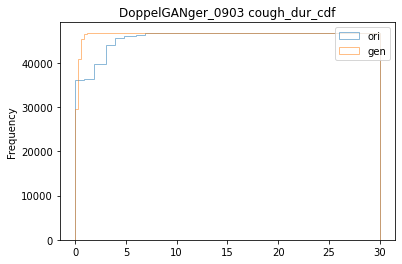

K-S test result: [4.5600000e-01 1.2193014e-05]


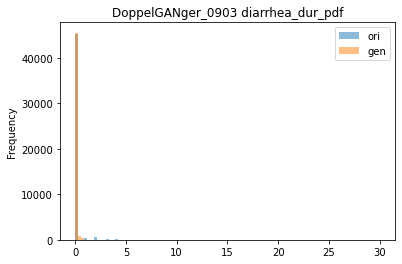

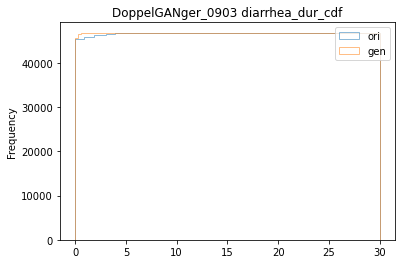

K-S test result: [5.73000000e-01 4.82783154e-13]


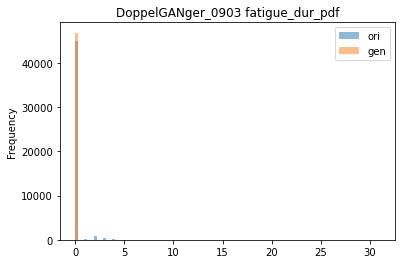

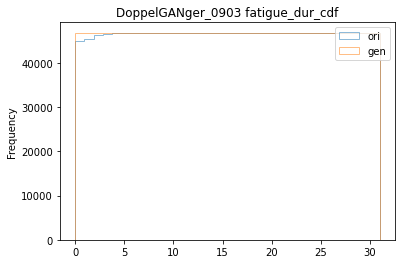

K-S test result: [8.7000000e-01 3.9789438e-34]


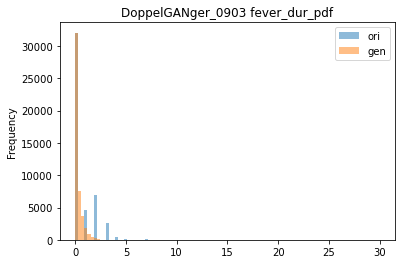

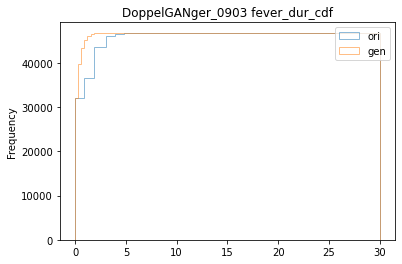

K-S test result: [0.303      0.00103971]


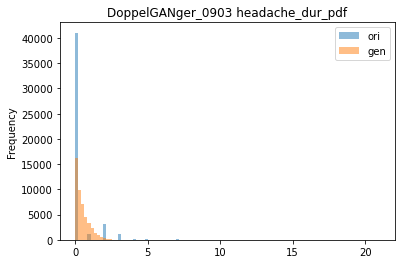

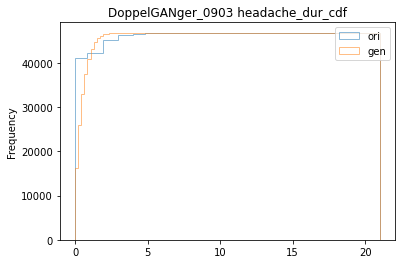

K-S test result: [8.66000000e-01 3.56845218e-33]


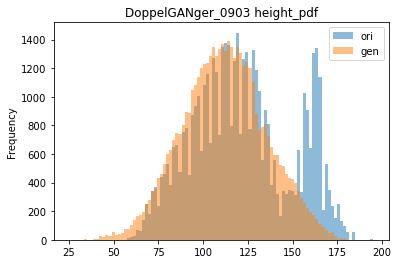

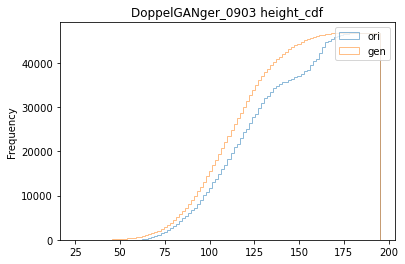

K-S test result: [0.203      0.08457473]


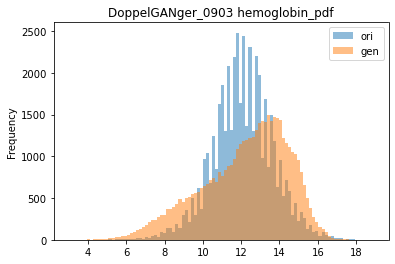

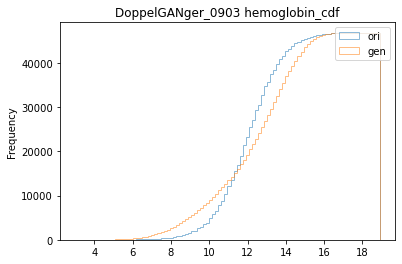

K-S test result: [0.224      0.05375251]


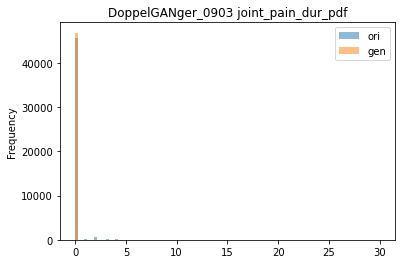

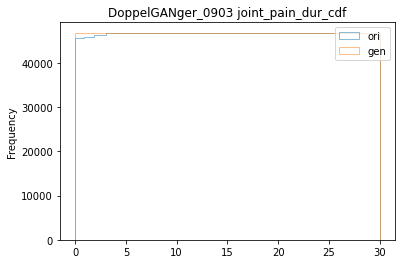

K-S test result: [0.026      0.99939249]


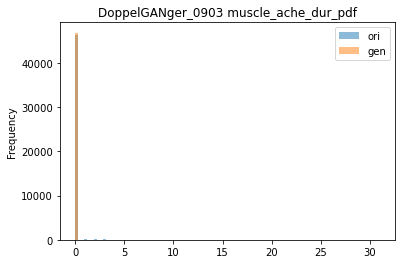

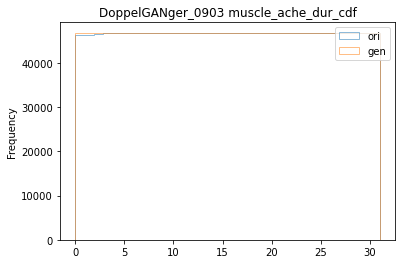

K-S test result: [0.011 1.   ]


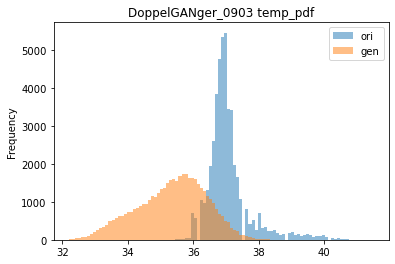

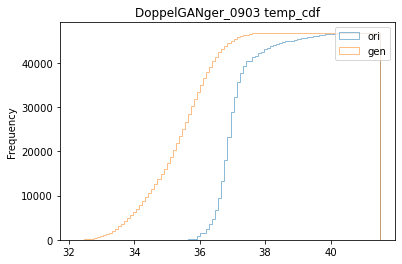

K-S test result: [7.92000000e-01 4.96229777e-24]


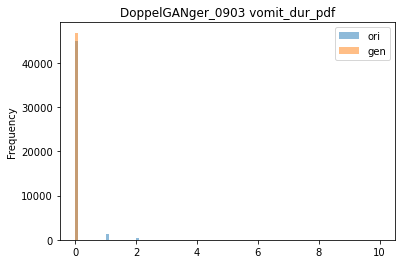

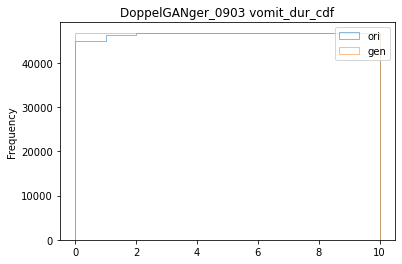

K-S test result: [0.077      0.85796657]


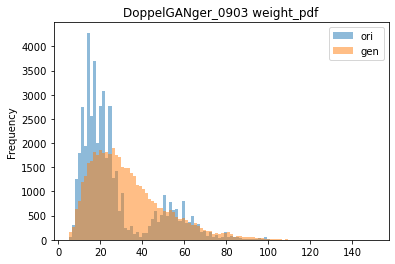

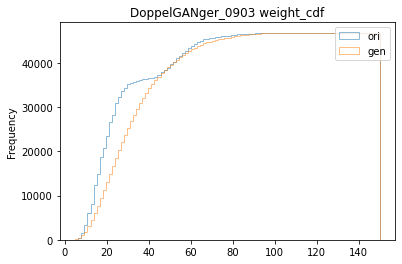

K-S test result: [0.295      0.01644598]


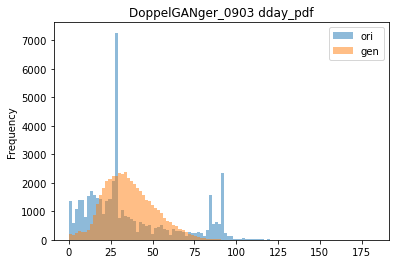

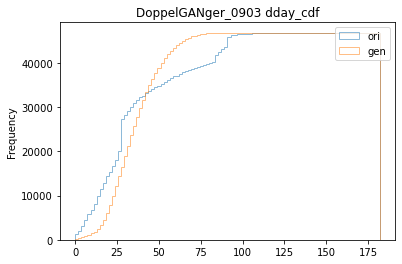

K-S test result: [0.256      0.00820654]


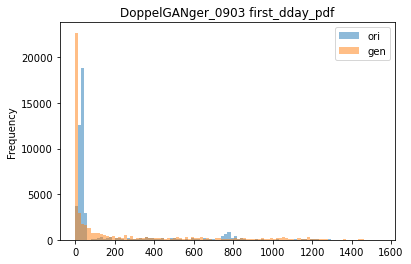

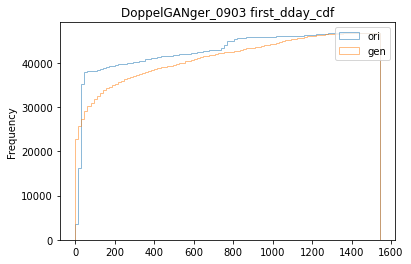

K-S test result: [4.02000000e-01 1.00863246e-05]


In [5]:
#Implement with all synthetic data and the corresponding real data.
for i in range(n):
    key = syn_keys[i]
    p_series = Histogram_KSTest(synthetic_num_dic[key][0],synthetic_num_dic[key][1],syn_name = key)
    if i == 0:
        p_df = pd.DataFrame(p_series,columns = [key])
    else:
        p_df = pd.concat([p_df,pd.DataFrame(p_series,columns = [key])],axis=1,sort = False)

### <u> Results cont. </u>

Table with p values of the Kolmogrov-Smirnov Test for each column, comparing the distribution of the original and the generated dataset. The closer the p values are to 1, the more similar the distribution of a column is between the original and the generated data.

In [6]:
pd.set_option('display.float_format', lambda x: '%.7f' % x)
display('Kolmogrov-Smirnov Test p value table',p_df)

'Kolmogrov-Smirnov Test p value table'

DoppelGANger_0903
ab_pain_dur                 0.0000000
age                         0.0681714
aneroxia_dur                0.0000000
plasmodium_density          0.0000000
cough_dur                   0.0000122
diarrhea_dur                0.0000000
fatigue_dur                 0.0000000
fever_dur                   0.0010397
headache_dur                0.0000000
height                      0.0845747
hemoglobin                  0.0537525
joint_pain_dur              0.9993925
muscle_ache_dur             1.0000000
temp                        0.0000000
vomit_dur                   0.8579666
weight                      0.0164460
dday                        0.0082065
first_dday                  0.0000101

### <u> Conclusions </u>

<a id = "cat_link" Here ></a>

## <font color=#472F91> 1.2 Categorical variables distribution comparison </font>

### <u> Method description </u>

For categorical columns, the empirical distribution of each variable for all categorical columns is calculated for the synthetic dataset and the original dataset.
A dot plot compares the empirical distribution of each variable for the original data set on the x axis and for the synthetic dataset on the y axis, giving a visual perception of the similarity in diversity and distribution. The closer the dot to the y=x line, the higher the fidelity.
<br>To quantifiy this, the MSE (mean squared error) between the empirical distribution for the original and synthetic dataset is calculated for each variable and averaged.
<br><b>The lower the averaged MSE, the higher the fidelity.</b>

### <u> Results </u>

This table displays the probability distributions for each unique variable for each categorical column. The values are plotted on the scatter plot below with generated values on the x axis which are compared to the original values on the y axis. The MSE between the generated and the original probability distributions is supplied below.

In [7]:
#Implement with all synthetic data and the corresponding real data.
d_array = np.zeros(n)
df_cat_dict = {}
for i in range(n):
    key = syn_keys[i]
    distance, df_cat = Scatter_Distance(synthetic_cat_dic[key][0],synthetic_cat_dic[key][1],syn_name = key)
    df_cat_dict[key] = df_cat
    d_array[i] = distance
distance_series= pd.Series(d_array,index = syn_keys)
display('categorical_column-averaged MSE of probability distributions of original and generated data', distance_series)

DoppelGANger_0903 gen probability  \
complicated_malaria_no                             True                          0.0212429   
complicated_malaria_not_assessed                   True                          0.9787571   
complicated_malaria_yes                            True                          0.0000000   
febrile_no                                         True                          0.7887032   
febrile_yes                                        True                          0.2112968   
ITN_no                                             True                          0.0000000   
ITN_not_applicable                                 True                          0.0287870   
ITN_yes                                            True                          0.9712130   
malaria_no                                         True                          0.9772183   
malaria_yes                                        True                          0.0227817   
malaria_parasite_blood_smear_indicated_but_not_... True                          0.0000000   
malaria_parasite_blood_smear_negative_/_lamp_ne... True                          0.4932681   
malaria_parasite_blood_smear_negative_/_lamp_no... True                          0.3392033   
malaria_parasite_blood_smear_negative_/_lamp_po... True                          0.0206446   
malaria_parasite_blood_smear_not_indicated         True                          0.0307531   
malaria_parasite_blood_smear_positive_/_no_malaria True                          0.0021585   
malaria_parasite_symptomatic_malaria               True                          0.1139725   
malaria_treatment_artmether-lumefantrine_for_un... True                          0.0235083   
malaria_treatment_no_malaria_medications_given     True                          0.9764917   
malaria_treatment_quinine_for_uncomplicated_mal... True                          0.0000000   
malaria_treatment_quinine_for_uncomplicated_mal... True                          0.0000000   
malaria_treatment_quinine_or_artesunate_for_com... True                          0.0000000   
plasmodium_gametocytes_no                          True                          0.9999359   
plasmodium_gametocytes_yes                         True                          0.0000641   
plasmodium_lamp_negative                           True                          0.3567490   
plasmodium_lamp_no_result                          True                          0.6323944   
plasmodium_lamp_positive                           True                          0.0108566   
visit_type_enrollment                              True                          0.0287870   
visit_type_scheduled_visit                         True                          0.6061293   
visit_type_unscheduled_visit                       True                          0.3650838   

                                                         DoppelGANger_0903 ori probability  
complicated_malaria_no                             True                          0.1220322  
complicated_malaria_not_assessed                   True                          0.8762160  
complicated_malaria_yes                            True                          0.0017519  
febrile_no                                         True                          0.6865829  
febrile_yes                                        True                          0.3134171  
ITN_no                                             True                          0.0017312  
ITN_not_applicable                                 True                          0.0277617  
ITN_yes                                            True                          0.9705070  
malaria_no                                         True                          0.8762160  
malaria_yes                                        True                          0.1237840  
malaria_parasite_blood_smear_indicated_but_not_... True                          0.0000412  
malaria_parasite_blood_sme

'categorical_column-averaged MSE of probability distributions of original and generated data'

DoppelGANger_0903   0.0048382
dtype: float64

### <u> Conclusions </u>

<a id = "pearsons_link" Here ></a>

## <font color=#472F91> 1.3 Pearson's Correlation Coefficient Comparison </font>

### <u> Method description </u>

To confirm dependencies between variables within columns are maintained, Pearson’s R correlation coefficient is calculated between categorical (all?) columns within the original and synthetic data. The R value measures the strength of association between 2 columns. Ideally, the real and synthetic data should have the same R value for a given pair of columns.
<br>To compare the datasets, we use two measurements. Firstly, the MSE (mean standard error) is calculated between each correlation coefficient.
<br><b>The lower the MSE, the higher the fidelity.</b>
<br>Secondly, the SRA (Synthetic Ranking Agreement) for each column is calculated. Here, the R correlation coefficients for the remaining columns are ranked for both the synthetic and the original data and compared.
<br><b>The closer SRA is to 1 the higher the fidelity.</b>

### <u> Results </u>

Two tables are displayed with the R correlation coefficient between all columns, for the original and for the generated data. For high level of correlation with an R > 0.5, the cell is coloured yellow. The fourth table displays the MSEs between the R correlation coefficients between the original and the generated data, displaying the result for each column.

In [8]:
n = len(syn_keys)
MSE_array = np.zeros(n)
for i in range(n):
    key = syn_keys[i]
    df_ori = synthetic_data_dic[key][0]
    df_gen = synthetic_data_dic[key][1]
    r_table_ori = r_corr_test(df_ori)
    r_table_gen = r_corr_test(df_gen)

    display(key+' '+'generated r table',r_table_gen.style.applymap(color_threshold_yellow))
    display(key+' '+'real r table',r_table_ori.style.applymap(color_threshold_yellow))
    sra = CorrelationSRA(r_table_ori,r_table_gen,ColumnWise=True)
    if i==0:
        sra_df = pd.DataFrame(sra,columns = [key])
    else:
        sra_df = pd.concat([sra_df,pd.DataFrame(sra,columns = [key])], axis = 1, sort = False)
    #display(key+' '+'SRA',sra)
    MSE_df, MSE_score = MSE(r_table_gen,r_table_ori)
    display(key+' '+'Table showing MSE of correlation coefficient R between columns', MSE_df)
    MSE_array[i] = MSE_score
MSE_series = pd.Series(MSE_array,index = syn_keys)

'DoppelGANger_0903 generated r table'

'DoppelGANger_0903 real r table'

'DoppelGANger_0903 Table showing MSE of correlation coefficient R between columns'

id  ab_pain_dur  \
id                                                 0.0000000    0.0000429   
ab_pain_dur                                        0.0000429    0.0000000   
age                                                0.0002264    0.0128281   
aneroxia_dur                                       0.0094825    0.0000349   
plasmodium_density                                 0.0000213    0.0840074   
cough_dur                                          0.0126800    0.0686624   
diarrhea_dur                                       0.0204755    0.1145833   
fatigue_dur                                        0.0001130    0.0005085   
fever_dur                                          0.0142094    0.0927941   
headache_dur                                       0.0000266    0.0013007   
height                                             0.0088373    0.0149329   
hemoglobin                                         0.0101860    0.0157665   
joint_pain_dur                                     0.0000058    0.0077327   
muscle_ache_dur                                    0.0003981    0.0081973   
temp                                               0.0018350    0.0011041   
vomit_dur                                          0.0033010    0.0323774   
weight                                             0.0126108    0.0113114   
complicated_malaria_no                             0.0108234    0.0026348   
complicated_malaria_not_assessed                   0.0104937    0.0025705   
complicated_malaria_yes                            0.0000603    0.0000110   
febrile_no                                         0.0083341    0.0093812   
febrile_yes                                        0.0083341    0.0093812   
ITN_no                                             0.0000697    0.0000192   
ITN_not_applicable                                 0.0016525    0.0000741   
ITN_yes                                            0.0017269    0.0000473   
malaria_no                                         0.0106387    0.0024897   
malaria_yes                                        0.0106387    0.0024897   
malaria_parasite_blood_smear_indicated_but_not_... 0.0000064    0.0000015   
malaria_parasite_blood_smear_negative_/_lamp_ne... 0.0114303    0.0144193   
malaria_parasite_blood_smear_negative_/_lamp_no... 0.0039730    0.0008862   
malaria_parasite_blood_smear_negative_/_lamp_po... 0.0071665    0.0012594   
malaria_parasite_blood_smear_not_indicated         0.0001514    0.0297427   
malaria_parasite_blood_smear_positive_/_no_malaria 0.0087814    0.0023385   
malaria_parasite_symptomatic_malaria               0.0096930    0.0025131   
malaria_treatment_artmether-lumefantrine_for_un... 0.0096716    0.0027244   
malaria_treatment_no_malaria_medications_given     0.0094416    0.0027315   
malaria_treatment_quinine_for_uncomplicated_mal... 0.0000023    0.0001300   
malaria_treatment_quinine_for_uncomplicated_mal... 0.0000939    0.0000160   
malaria_treatment_quinine_or_artesunate_for_com... 0.0000603    0.0000110   
plasmodium_gametocytes_no                          0.0014053    0.0005341   
plasmodium_gametocytes_yes                         0.0014053    0.0005341   
plasmodium_lamp_negative                           0.0120349    0.0101118   
plasmodium_lamp_no_result                          0.0029840    0.0145776   
plasmodium_lamp_positive                           0.0074716    0.0011706   
visit_type_enrollment                              0.0016525    0.0000741   
visit_type_scheduled_visit                         0.0023388    0.0322637   
visit_type_unscheduled_visit                       0.0039052    0.0338984   
dday                                               0.0651535    0.0031129   
first_dday                                         0.0285740    0.0186011   

                                                         age  aneroxia_dur  \
id                                                 0.0002264     0.0094825   
ab_pain_dur                                        

### <u> Results cont. </u>

The averaged MSE for all columns between the orignal and generated data is presented below.
<br>The table below the MSE includes the SRA (Synthetic Ranking Accuracy) for each column where it's R correlation coefficients with the remaining columns are ranked for both the synthetic and the original data and compared.

In [9]:
display('averaged MSE values of R for each version of synthetic data', MSE_series)

'averaged MSE values of R for each version of synthetic data'

DoppelGANger_0903   0.0251338
dtype: float64

In [10]:
display('SRA: Ranking each column and comparing between original and generated data', sra_df)

'SRA: Ranking each column and comparing between original and generated data'

DoppelGANger_0903
id                                                          0.3894558
ab_pain_dur                                                 0.4515306
age                                                         0.5680272
aneroxia_dur                                                0.4795918
plasmodium_density                                          0.4727891
cough_dur                                                   0.5102041
diarrhea_dur                                                0.3962585
fatigue_dur                                                 0.4863946
fever_dur                                                   0.4404762
headache_dur                                                0.4183673
height                                                      0.6215986
hemoglobin                                                  0.5697279
joint_pain_dur                                              0.0076531
muscle_ache_dur                                             0.0076531
temp                                                        0.5408163
vomit_dur                                                   0.4540816
weight                                                      0.5612245
complicated_malaria_no                                      0.5748299
complicated_malaria_not_assessed                            0.5892857
complicated_malaria_yes                                     0.0119048
febrile_no                                                  0.5518707
febrile_yes                                                 0.5518707
ITN_no                                                      0.0076531
ITN_not_applicable                                          0.5442177
ITN_yes                                                     0.5756803
malaria_no                                                  0.5858844
malaria_yes                                                 0.5841837
malaria_parasite_blood_smear_indicated_but_not_...          0.0076531
malaria_parasite_blood_smear_negative_/_lamp_ne...          0.5773810
malaria_parasite_blood_smear_negative_/_lamp_no...          0.5765306
malaria_parasite_blood_smear_negative_/_lamp_po...          0.5416667
malaria_parasite_blood_smear_not_indicated                  0.5586735
malaria_parasite_blood_smear_positive_/_no_malaria          0.4064626
malaria_parasite_symptomatic_malaria                        0.5926871
malaria_treatment_artmether-lumefantrine_for_un...          0.5518707
malaria_treatment_no_malaria_medications_given              0.5790816
malaria_treatment_quinine_for_uncomplicated_mal...          0.0127551
malaria_treatment_quinine_for_uncomplicated_mal...          0.0127551
malaria_treatment_quinine_or_artesunate_for_com...          0.0119048
plasmodium_gametocytes_no                                   0.4438776
plasmodium_gametocytes_yes                                  0.4447279
plasmodium_lamp_negative                                    0.5323129
plasmodium_lamp_no_result                                   0.5595238
plasmodium_lamp_positive                                    0.5127551
visit_type_enrollment                                       0.5442177
visit_type_scheduled_visit                                  0.5459184
visit_type_unscheduled_visit                                0.5365646
dday                                                        0.5331633
first_dday                                                  0.4965986
AVERAGE                                                     0.4394350

### <u> Conclusions </u>

<hr>

# <font color=#0275D8> 2. Fidelity Evaluation </font>

<a id = "tSNE_PCA_link" Here ></a>

## <font color=#472F91> 2.1 tSNE and PCA plots comparison </font>

### <u> Method description </u>

tSNE and PCA plots reduce a multi-dimensional dataset (i.e with multiple columns) into a 2-dimensional visualisation. 
<br>A machine-learning algorithm groups similar variables and although we cannot interpret the coordinates attributed, we can compare if the groupings made are similar in the original and synthetic data by overlaying the plots.
<br><b>The higher the overlay, the higher the fidelity.</b>

### <u> Results </u>

tSNE and PCA plot overlays for original and generated data

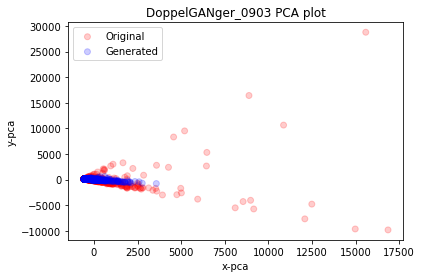

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.059s...
[t-SNE] Computed neighbors for 2000 samples in 1.905s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 13.868645
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.924652
[t-SNE] KL divergence after 300 iterations: 1.018501


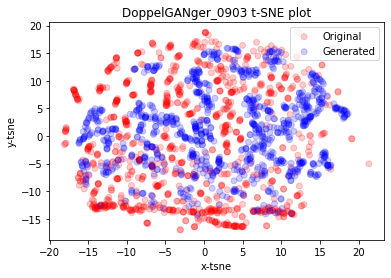

In [11]:
for i in range(n):
    key = syn_keys[i]
    dp_pca_results, dp_pca_hat_results = visualization(synthetic_array_dic[key][0], synthetic_array_dic[key][1], 'pca',syn_name = key)
    dp_tsne_results, dp_tsne_hat_results = visualization(synthetic_array_dic[key][0], synthetic_array_dic[key][1], 'tsne',syn_name = key)

### <u> Conclusions </u>

<a id = "discrim_link" Here ></a>

## <font color=#472F91> 2.2 Discriminative model performance </font>

### <u> Model Description </u>
For a quantitative measure of similarity, a post-hoc time-series classification model is trained (by optimizing a multi-layer GRU) to distinguish between sequences from the original and generated datasets.
First, each original sequence is labeled '1', and each generated sequence is labeled '0'.
<br>Then, an off-the-shelf (RNN) classifier is trained to distinguish between the two classes as a standard supervised task.
<br>An accuracy score on the held-out test set gives a quantitative assessment of fidelity.
<br><b>An accuracy score similar to the expected accuracy score for an untrained discriminative model indicates the discriminator cannot tell the difference between both datasets.</b>

### <u> Results </u>

A table with the report is displayed together with the expected accuracy and the obtained accuracy. The more similar these two values are, the better the fidelity of the generated data towards the original data.

In [12]:
for i in range(n):
    key = syn_keys[i]

    # train discriminative model
    train_data, val_data, test_data, train_labels, val_labels, test_labels = train_val_test_split(ori_data=synthetic_array_num_dic[key][0], gen_data=synthetic_array_num_dic[key][0])

    input_dim = np.asarray(synthetic_array_num_dic[key][0]).shape[2]
    d_model = discriminative_model(input_size=[None, input_dim], hidden_dim=64)

    # CHANGE TO MORE EPOCHS
    history_d_model = d_model.fit(train_data, train_labels, batch_size=128, epochs=10, validation_data=(val_data, val_labels), verbose=0)

    d_model.evaluate(test_data, test_labels)

    # get prediction from test data
    test_pred = np.round(d_model.predict(test_data))

    report = classification_report(test_labels, test_pred, digits=5, output_dict=True)
    report = pd.DataFrame(report).transpose()
    print(report)

    exp_acc = np.sum(test_labels)/np.shape(test_labels)[0]
    print('Expected accuracy for an untrained discriminative model = ', str(exp_acc))
    print('Final accuracy of trained discriminative model = ', str(accuracy_score(test_labels, test_pred)))

13/13 [==============================] - 0s 18ms/step - loss: 0.7014
              precision    recall  f1-score     support
0.0           0.5000000 0.0255102 0.0485437 196.0000000
1.0           0.5164557 0.9760766 0.6754967 209.0000000
accuracy      0.5160494 0.5160494 0.5160494   0.5160494
macro avg     0.5082278 0.5007934 0.3620202 405.0000000
weighted avg  0.5084920 0.5160494 0.3720824 405.0000000
Expected accuracy for an untrained discriminative model =  0.5160493827160494
Final accuracy of trained discriminative model =  0.5160493827160494


### <u> Conclusions </u>

<a id = "auto_link" Here ></a>

## <font color=#472F91> 2.3 Autocorrelation comparison </font>

### <u> Model description </u>

To confirm the variance in numerical values/counts over time are maintained, autocorrelation graphs are plotted for both datasets and overlayed.
<br><b>The higher the overlay, the higher the fidelity.</b>

### <u> Results </u>

The following plots show overlays of the autocorrelation plots for original and generated data for number of visits per week and number of positive malaria diagnosis per week.

In [13]:
acf_dict = {}
for i in range(n):
    key = syn_keys[i]
    ori_auto_5above, table_freq_visit_week_ori = auto_prep(synthetic_auto_dic[key][0])
    gen_auto, table_freq_visit_week_gen = auto_prep(synthetic_auto_dic[key][1])
    acf_df_week_visits, autocorrelation_plot_week_visits = autocorrelation(ori_auto_5above, gen_auto, table_freq_visit_week_ori,table_freq_visit_week_gen, key, " plot for number of visits per week")
    acf_dict[key] = acf_df_week_visits
    display(autocorrelation_plot_week_visits)


In [14]:
acf_malaria_dict = {}
for i in range(n):
    key = syn_keys[i]
    malaria_ori=subset(synthetic_auto_dic[key][0],'Malaria diagnosis [EUPATH_0000090]')
    malaria_gen=subset(synthetic_auto_dic[key][1],'Malaria diagnosis [EUPATH_0000090]')
    malaria_ori, table_freq_malaria_ori = auto_prep(malaria_ori)
    malaria_gen, table_freq_malaria_gen = auto_prep(malaria_gen)
    acf_df_malaria, autocorrelation_plot_malaria=autocorrelation(malaria_ori, malaria_gen, table_freq_malaria_ori, table_freq_malaria_gen, key, " plot for malaria diagnosis per week")
    acf_malaria_dict[key] = acf_df_malaria
    display(autocorrelation_plot_malaria)

### <u> Conclusions </u>

<hr>

# <font color=#0275D8> 3. Usefulness evaluation </font>

<a id = "pred_link" Here ></a>

## <font color=#472F91> 3.1 Predictive model performance comparison </font>

### <u> Method description </u>

A series of commonly used regression based predictive models (Linear Regression, Linear Support Vector Regression, Random Forests Regression, Logistic Regression, Decision tree Regression and K-Nearest Neighbors Regression) are applied to the test samples and trained on the train samples for both the original and the synthetic data (Test-on-real, Train-on-real & Test-on-synthetic, Train-on-synthetic). The model attempts to predict a variable within a column based on the remaining columns.  
    The MSE (mean squared error) is calculated between the predicted value resulting from the predictive model and the test sample and averaged (MSE_1), resulting in MSE_1's for each column, for each predictive model, for the original and synthetic datasets (visualised in the first scatter plot below).  
    <br>To compare the datasets, the MSE between the MSE_1's of the original and the synthetic dataset is calculated (MSE_2), resulting in MSE_2's for each predictive model.
    <br>The average of MSE_1's for all columns is calculated between the datasets (MSE_3), resulting in MSE_3 for each predictive model, for the original and the synthetic dataset (visualised in the second scatter plot below).
    <br> To compare datasets, the MSE between the MSE_3's for the original and the synthetic data is calculated (MSE_4).
    <br><b>A low MSE_2/MSE_4 indicates the synthetic and original dataset behaved similarly in the predictive models.</b>
    <br>Because users to do not have access to the original data, synthetic data should behave similarly to the original data when trained using any algorithms.  
    To assess this, we use SRA (Synthetic Ranking Agreement) which focuses on measuring how similar algorithms perform when trained with original and synthetic data. The MSE_1's (MSE for each column) for each predictive model are ranked and the ranking  of the original and synthetic data are compared, resulting in SRA_1 for each column.
    <br>Similarly, the MSE_3's (column-averaged MSE) for each predictive model can be ranked, giving an SRA_2 measure.
    <br><b>SRA values close to 1 indicate the synthetic and original dataset behave similarly when trained on different predictive models.</b>

### <u> Results </u>

The following table shows the MSE_1's (i.e the prediction scores) obtained for each column for each predictive model in the original and in the generated data. 
<br>The original log(MSE_1) and the generated log(MSE_1) are used as coordinates for the scatter plot below. We use the log(MSE) (instead of the MSE) to simplify visualisation.
<br>The MSE's between the original and the generated data (MSE_2) can be seen below the scatter plots for each model. The averaged MSE between all models is also displayed.

In [15]:
# MSE_1
colmse_t = Comparison_Table(synthetic_num_dic, aver=False, models=['LR', 'KNR1', 'DTR'])
display(colmse_t)

DoppelGANger_0903                                                       \
                   ori                                                        
           ab_pain_dur        age aneroxia_dur plasmodium_density cough_dur   
LR           0.7373421 59.2229137    0.2653583 1072128022.6832099 2.1263892   
KNR1         0.8592613 30.4256925    0.3052135 1273749979.8451047 2.5956867   
DTR          1.6403957  9.7597012    0.5291838 2438800579.1225886 3.8656224   

                                                                  ...  \
                                                                  ...   
     diarrhea_dur fatigue_dur fever_dur headache_dur      height  ...   
LR      0.2069876   0.2386669 0.7976686    0.5268543 130.9699592  ...   
KNR1    0.2424303   0.3140577 1.1255367    0.6513108  76.1272625  ...   
DTR     0.5713108   0.4625721 1.3187964    1.0178071  27.1210844  ...   

                                                                         \
              gen                                                         
     headache_dur      height hemoglobin joint_pain_dur muscle_ache_dur   
LR      0.1250117  53.6973892  0.5543523      0.0000000       0.0000000   
KNR1    0.1033621 124.4255675  1.7347953      0.0000000       0.0000000   
DTR     0.0411943  50.7462358  0.6546950      0.0000000       0.0000000   

                                                               
                                                               
          temp vomit_dur     weight        dday    first_dday  
LR   0.1536322 0.0000028 55.7776717 115.6277861 76497.4886819  
KNR1 0.4151907 0.0000020 47.5361383 158.1353030 75784.1776167  
DTR  0.1634087 0.0000015 16.6185366 143.3763377 11044.1965744  

[3 rows x 36 columns]

In [16]:
plot_colmse(colmse_t)

In [17]:
# MSE_2
avg_modelmse_t = get_avg_mse_per_model(colmse_t)
print("Column-averaged MSE between real and generated data for each model")
display(avg_modelmse_t)

Column-averaged MSE between real and generated data for each model


DoppelGANger_0903
LR    61599223908606720.0000000
KNR1  88348679183467712.0000000
DTR  329805048726754048.0000000

In [18]:
print("mean across models of the column-averaged-MSE ")
get_mean_avg_modelmse(avg_modelmse_t)

mean across models of the column-averaged-MSE 


DoppelGANger_0903
mean model-averaged mse 159917650606276160.0000000

### <u> Results cont. </u>
The following table shows the column-averaged MSE's from MSE_1 values (MSE_3) for each predictive model for the original and synthetic data. 
<br>The original and generated MSE values are used as coordinates for the scatter plot below. 
<br> The MSE between the original and generated values (MSE_4) is shown below.

In [19]:
# MSE_3
com_t = Comparison_Table(synthetic_num_dic, aver=True, models=['LR', 'KNR1'])
print('column-averaged MSE for each model for the original and synthetic data')
display(com_t)

column-averaged MSE for each model for the original and synthetic data


DoppelGANger_0903                
               ori MSE         gen MSE
LR    68174190.4905710 1101764.6306601
KNR1  78414981.4499926  759518.8475331

In [20]:
Scatter_TSTS_TRTR(com_t)

In [21]:
# MSE_4
print("model-averaged MSE of (column-averaged MSE between original and generated data)")
get_origen_mse(com_t)

model-averaged MSE of (column-averaged MSE between original and generated data)


DoppelGANger_0903
avg ori gen MSE 5264540591367614.0000000

### <u> Results cont. </u>
This presents the SRA for each column (SRA_1), where the MSE_1's for each predictive model were ranked and compared between original and synthetic data. This is repeated for all the columns.
<br> The second table (SRA_2) displays the SRA value that was calculated using the column-averaged  MSE's (MSE_3) ranking the predictive models which is compared between the original and synthetic data. 

In [22]:
# SRA_1
sra_col_t = get_SRA_per_col(colmse_t, num_cols)
print("SRA: Ranking the MSE of each model compared between real and original data")
display(sra_col_t)

SRA: Ranking the MSE of each model compared between real and original data


DoppelGANger_0903                                                      \
          ab_pain_dur       age aneroxia_dur plasmodium_density cough_dur   
SRA         0.0000000 1.0000000    0.3333333          0.0000000 0.3333333   

                                                                          \
    diarrhea_dur fatigue_dur fever_dur headache_dur    height hemoglobin   
SRA    0.0000000   0.0000000 0.3333333    0.0000000 0.6666667  0.3333333   

                                                                            \
    joint_pain_dur muscle_ache_dur      temp vomit_dur    weight      dday   
SRA      0.0000000       0.0000000 0.6666667 0.0000000 1.0000000 0.6666667   

                
    first_dday  
SRA  0.0000000

In [23]:
# SRA_2
sra_E = SRA_TSTS_TRTR(com_t)
display(sra_E)

'SRA: Ranking MSE for each model between real and generated data'

DoppelGANger_0903   0.0000000
dtype: float64

### <u> Conclusions </u>

<a id = "tpred_link" Here ></a>

## <font color=#472F91> 3.2 Next-step predictive model performance comparison </font>

### <u> Method description </u>
This method has a similar principal to the previous method with the difference that the predictive model attempts to predict all variables for next time-step entry
    based on the values for previous time-stamps.
    <br>Here the predictive model provided by Tensorflow Keras API returns a test metric and a test loss for each column.
    <br>To compare between datasets, two parameters are determined.
    <br>Firstly, the MSE of the test loss/test metric is calculated between the real and the synthetic data for each column.
    <br>Secondly, the SRA is calculated, ranking the test metric/test loss of each column, and then comparing the rank for the synthetic and the original data.
    <br><b>A low MSE and an SRA close to 1 indicates the predictive model behaves similarly in attempting to predict the next time-step in both datasets.</b>

### <u> Results </u>
The following table gives a report on the test metric and test loss for each column when trained with with the number of epochs and windows described below.
<br> The scatter plots display the test metric or the test loss for the original data (x axis) and generated data (y axis) for each predicted column.
<br> Finally, the MSE of the test metric and the test loss for all columns is calculated between the original and the generated data. In parallel, the SRA is also calculated, where the test metric or test loss for each column is ranked and compared between the original and the generated data.

In [24]:
# CHANGE TO ALL COLUMNS and HAVE MORE EPOCHS
TxTx_tpred = TxTx_tpred_multiple(synthetic_array_num_dic, y_cols=[0,1,2], y_cols_name=num_cols[:3], windows=65, epochs=1, show_training=False)
TxTx_tpred


Predictive model running for column  ab_pain_dur  with window length  65
Getting results for column  ab_pain_dur  with window length  65
693/696 [============================>.] - ETA: 0s - loss: 0.0429 - last_time_step_mae: 0.00696/696 [==============================] - 6s 9ms/step - loss: 0.0429 - last_time_step_mae: 0.0050

Predictive model running for column  age  with window length  65
Getting results for column  age  with window length  65
691/696 [============================>.] - ETA: 0s - loss: 2.1032 - last_time_step_mae: 0.29696/696 [==============================] - 6s 9ms/step - loss: 2.1432 - last_time_step_mae: 0.3064

Predictive model running for column  aneroxia_dur  with window length  65
Getting results for column  aneroxia_dur  with window length  65
696/696 [==============================] - 6s 9ms/step - loss: 0.0237 - last_time_step_mae: 0.0025

Predictive model running for column  ab_pain_dur  with window length  65
Getting results for column  ab_pain_dur  with

DoppelGANger_0903                                                 \
              y_col test_loss_trtr test_metric_trtr test_loss_tsts   
0       ab_pain_dur      0.0428817        0.0049622      0.1124276   
1               age      2.1432242        0.3064293      2.0071959   
2      aneroxia_dur      0.0237130        0.0025021      0.0997821   

                    
  test_metric_tsts  
0        0.0133843  
1        0.2768304  
2        0.0117708

In [25]:
plot_TxTx_tpred(TxTx_tpred)

In [26]:
TxTx_tpred_mse = get_TxTx_mse(TxTx_tpred)
print("numerical_column-averaged MSE between TRTR and TSTS ")
TxTx_tpred_mse

numerical_column-averaged MSE between TRTR and TSTS 


DoppelGANger_0903            
                      test_loss metric_loss
trtr tsts MSE         0.0097089   0.0003443

In [27]:
TxTx_tpred_sra = get_TxTx_SRA(TxTx_tpred)
print("SRA: Ranking numerical columns between real and synthetic data")
TxTx_tpred_sra

SRA: Ranking numerical columns between real and synthetic data


DoppelGANger_0903            
            test_loss metric_loss
SRA         1.0000000   1.0000000

<hr>

# <font color=#0275D8> CSV exports </font>

In [28]:
# define version of data to be saved
# since some functions concatenate all versions together in one df while others produce separate ones
version = 'DoppelGANger_0903'

##1.1 Histograms
##combine ori_num and gen_num
ori_num.columns=[str(col) + '_ori' for col in ori_num.columns]
gen_num.columns=[str(col) + '_gen' for col in gen_num.columns]
hist_df=pd.concat([ori_num, gen_num], axis=1, sort=False)
#hist_df.to_csv('csv_results_0903/distribution_num_coordinates.csv')

##1.2 Categorical plots
df_cat_1 = df_cat_dict[version]
# df_cat_1.to_csv('csv_results_0903/distribution_cat_coordinates.csv')

##2.1 tSNE and PCA plots
dp_pca_np = np.concatenate([dp_pca_results, dp_pca_hat_results], axis = 1)
dp_pca_df = pd.DataFrame(dp_pca_np, columns = ['real_x', 'real_y', 'gen_x', 'gen_y'])
dp_pca_df.to_csv('csv_results_0903/pca_coordinates.csv', index=False)
dp_tsne_np = np.concatenate([dp_tsne_results, dp_tsne_hat_results], axis = 1)
dp_tsne_df = pd.DataFrame(dp_tsne_np, columns = ['real_x', 'real_y', 'gen_x', 'gen_y'])
dp_tsne_df.to_csv('csv_results_0903/tsne_coordinates.csv', index=False)

##2.3 Autocorrelation

acf_df_week_visits_1 = acf_dict[version]
acf_df_week_visits_1.to_csv('csv_results_0903/autocorrelation_visitweeks.csv')
acf_df_malaria_1 = acf_malaria_dict[version]
acf_df_malaria_1.to_csv('csv_results_0903/autocorrelation_malaria.csv')

##3.1 Predictive model
##still need to change colmse_t here to be able to export
log_colmse_t = np.log(colmse_t)
#log_colmse_t.to_csv('csv_results/MSE_1_coordinates_figure1.csv')
#com_t.to_csv('csv_results/MSE_3_coordinates_figure2.csv') #manually remove first row before seeding

##3.2 Time Predictive model
TxTx_tpred.to_csv('csv_results_0903/t_Predictive_coordinates.csv') #manually remove top row and first column b4 seeding